# You should specify the columns on data= call to import only the parts we need from the frame

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv('notebook/05-Seaborn/dm_office_sales.csv')
df

,division,level of education,training level,work experience,salary,sales
0,printers,some college,2,6,91684,372302
1,printers,associate's degree,2,10,119679,495660
2,peripherals,high school,0,9,82045,320453
3,office supplies,associate's degree,2,5,92949,377148
4,office supplies,high school,1,5,71280,312802
...,...,...,...,...,...,...
995,computer hardware,associate's degree,1,1,70083,177953
996,computer software,associate's degree,1,0,68648,103703
997,peripherals,associate's degree,2,8,108354,450011
998,peripherals,associate's degree,2,3,79035,330354


In [4]:
df['division'].value_counts()

office supplies      252
printers             250
peripherals          243
computer hardware    159
computer software     96
Name: division, dtype: int64

<AxesSubplot:xlabel='division', ylabel='count'>

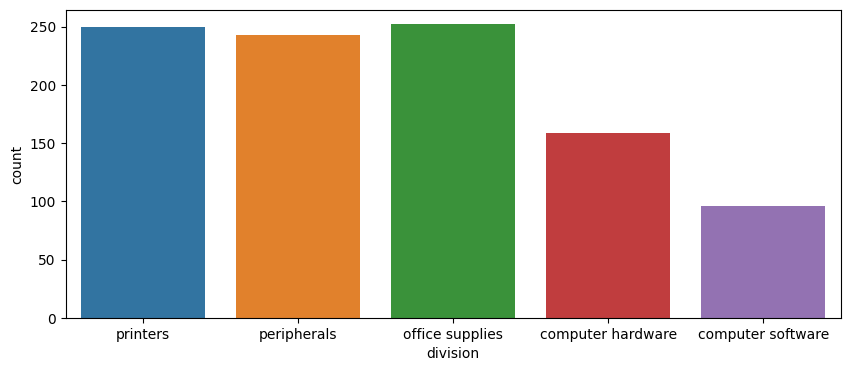

In [5]:
# we can visualise this with seaborn.countplot()
# remember this data has no mid states since it is categorical
plt.figure(figsize=(10,4), dpi=100)
sns.countplot(data=df, x = 'division')

<AxesSubplot:xlabel='division', ylabel='count'>

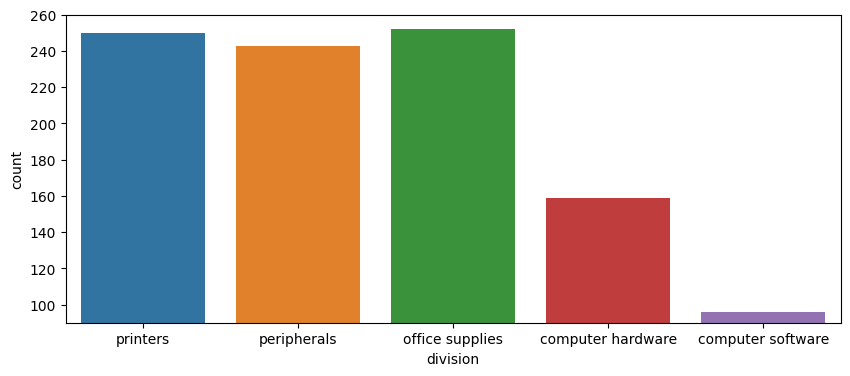

In [6]:
plt.figure(figsize=(10,4), dpi=100)
plt.ylim(90,260) # we apply ylim to set boundaries
sns.countplot(data=df, x = 'division')

Now repeat with level of education

<AxesSubplot:xlabel='level of education', ylabel='count'>

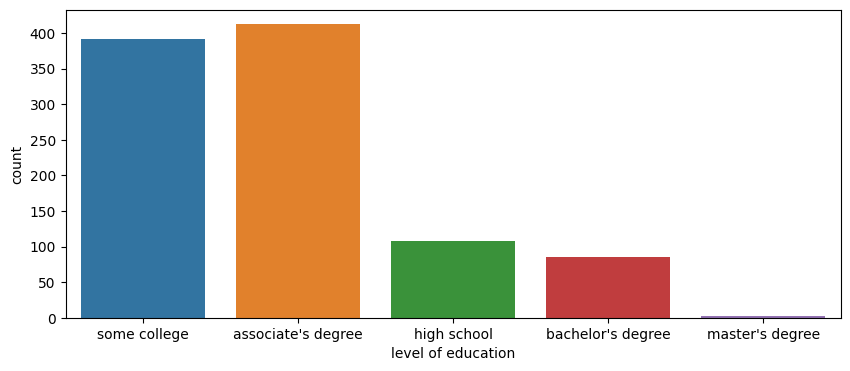

In [7]:
plt.figure(figsize=(10,4), dpi=100)
sns.countplot(data= df, x='level of education')
# it looks like there are no masters students

In [8]:
df['level of education'].value_counts()

associate's degree    412
some college          392
high school           108
bachelor's degree      85
master's degree         3
Name: level of education, dtype: int64

<AxesSubplot:xlabel='level of education', ylabel='count'>

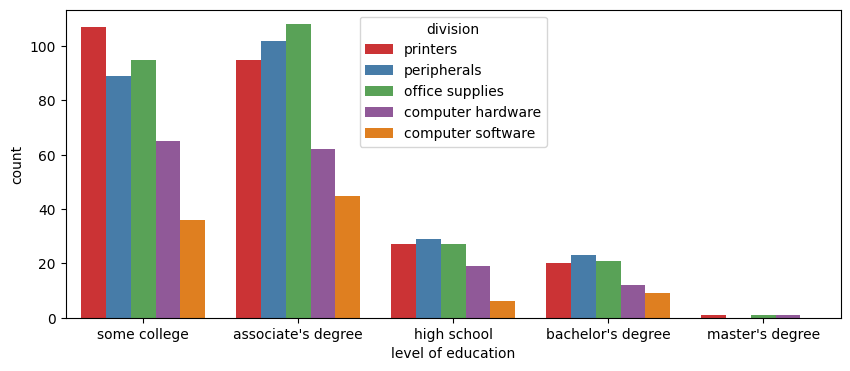

In [9]:
plt.figure(figsize=(10,4),dpi = 100)
sns.countplot(data=df, x = 'level of education', hue='division', palette='Set1')

<AxesSubplot:xlabel='level of education', ylabel='salary'>

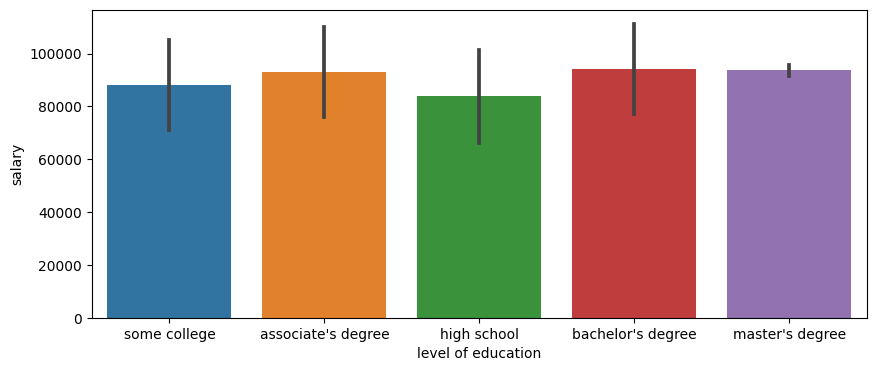

In [10]:
# countplot is essentialy a barplot with y being the count
# 3rd argument is the method of aggregation
# find the mean salary x level of education
# ci - confidence interval
# ci = 'sd' will hsow the standar deviation for the mean
plt.figure(figsize=(10,4))
sns.barplot(data = df, x = 'level of education', y = 'salary', estimator=np.mean, ci='sd')

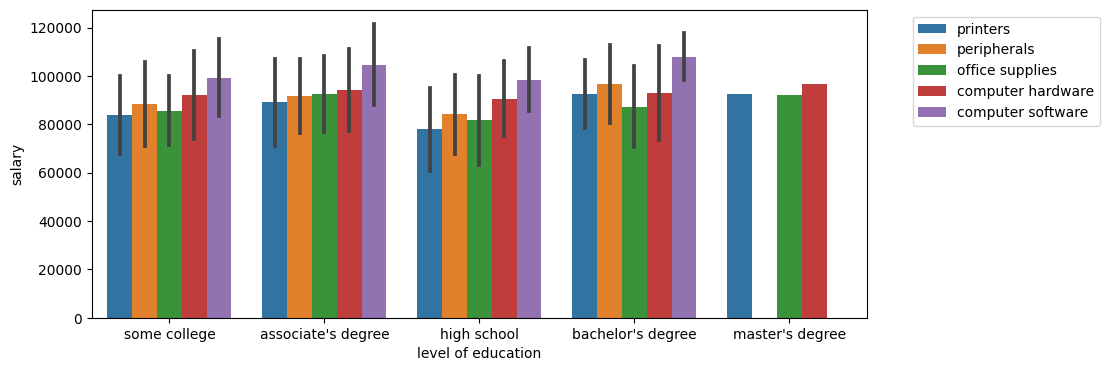

In [11]:
# You can add hue for an additional layer of information
plt.figure(figsize=(10,4), dpi=100)
sns.barplot(data= df, x = 'level of education', y = 'salary', ci = 'sd', hue='division')
# masters degree has no black line since those are the only 3 points
plt.legend(bbox_to_anchor=(1.05, 1))

* Box plot displays distribution of a continuous variable, displays the distribution through quartiles

In [12]:
df = pd.read_csv('notebook/05-Seaborn/StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


<AxesSubplot:xlabel='test preparation course', ylabel='math score'>

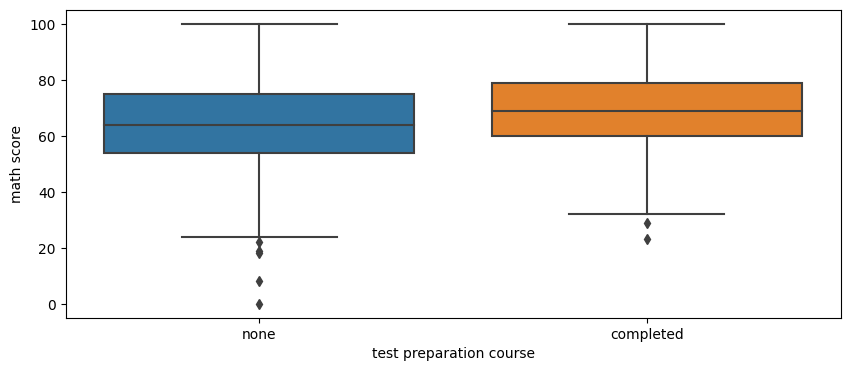

In [13]:
# box plot for math score
plt.figure(figsize=(10,4), dpi=100)
sns.boxplot(data=df, y= 'math score', x=  'test preparation course') # this will show the overall dist of the boxplot
# y - denots what distribution we want
# x - denotes the categories we want to study the distribution for
# students with preperation have performed better and have smaller deviation

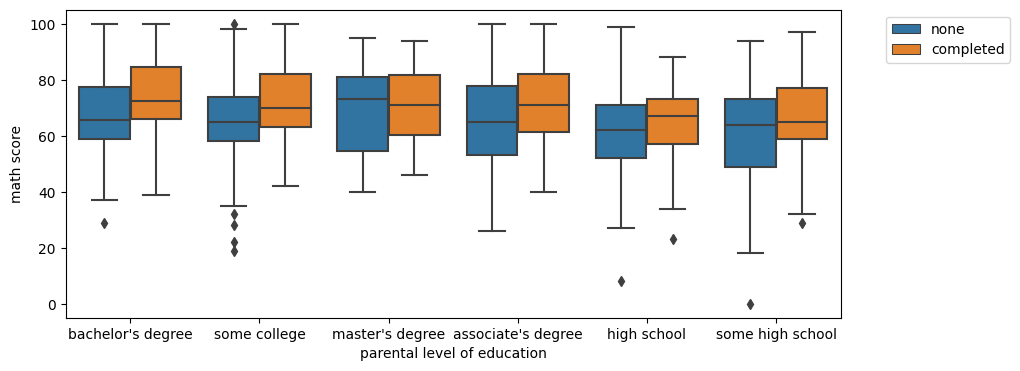

In [14]:
# how does the parental level of education impact test scores
plt.figure(figsize=(10,4), dpi=100)
sns.boxplot(data=df, y = 'math score', x= 'parental level of education', hue='test preparation course')
plt.legend(bbox_to_anchor=(1.05,1))

<AxesSubplot:xlabel='reading score', ylabel='parental level of education'>

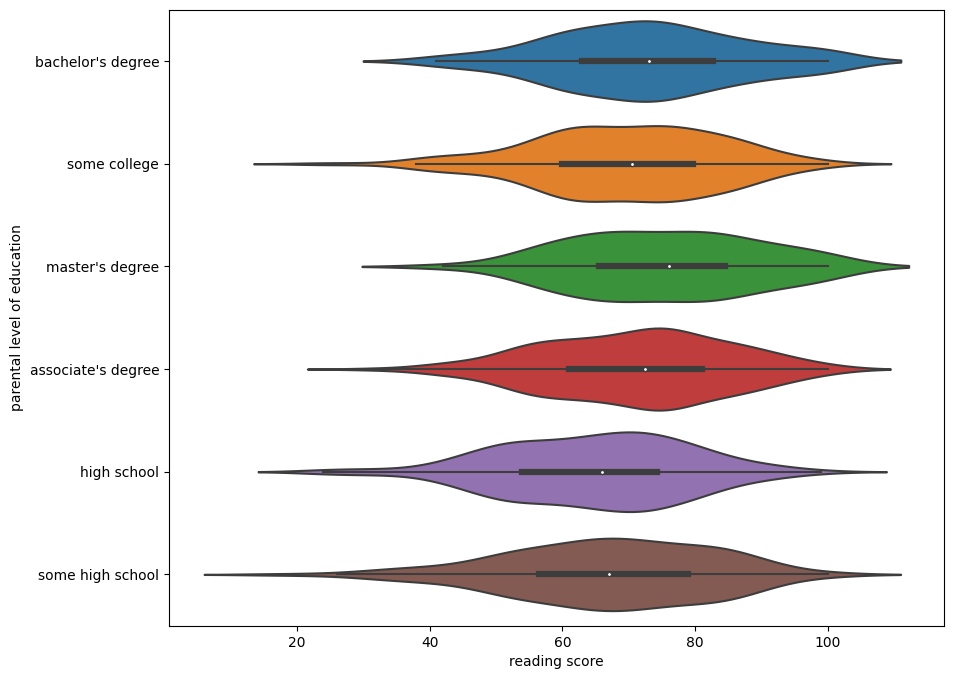

In [15]:
# Violin plot
plt.figure(figsize=(10,8))
sns.violinplot(data=df, x = 'reading score', y = 'parental level of education') 

<AxesSubplot:xlabel='reading score', ylabel='parental level of education'>

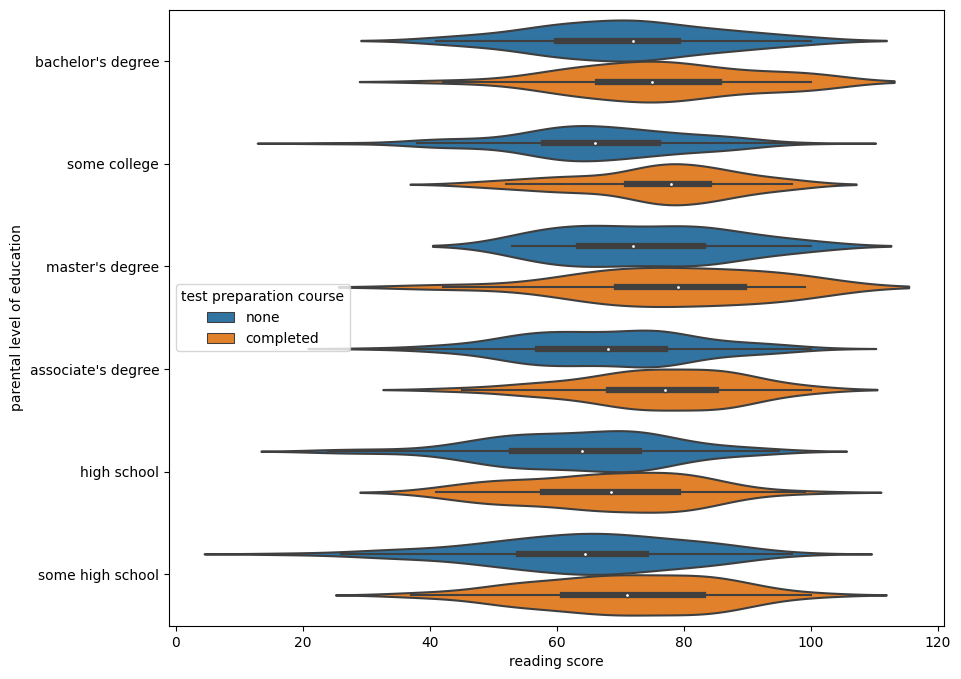

In [16]:
# violing plot 3d with hue
plt.figure(figsize=(10,8))
sns.violinplot(data=df, x = 'reading score', y = 'parental level of education', hue='test preparation course') 


<AxesSubplot:xlabel='reading score', ylabel='parental level of education'>

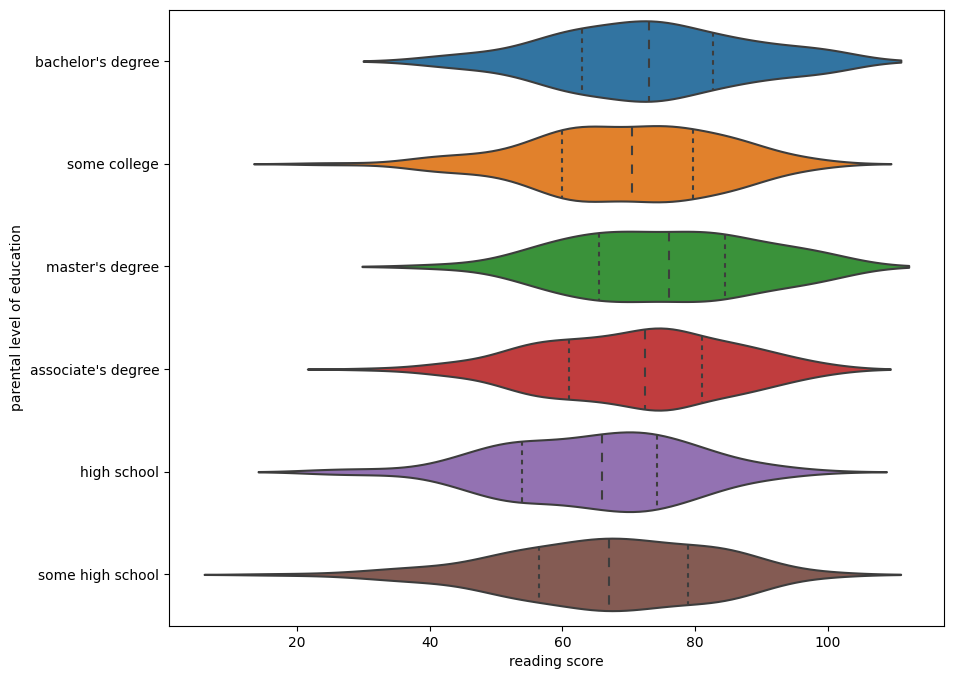

In [17]:
plt.figure(figsize=(10,8))
sns.violinplot(data=df, x = 'reading score', y = 'parental level of education', split=True, inner='quartile') # will draw the quartile lines

<AxesSubplot:xlabel='reading score', ylabel='parental level of education'>

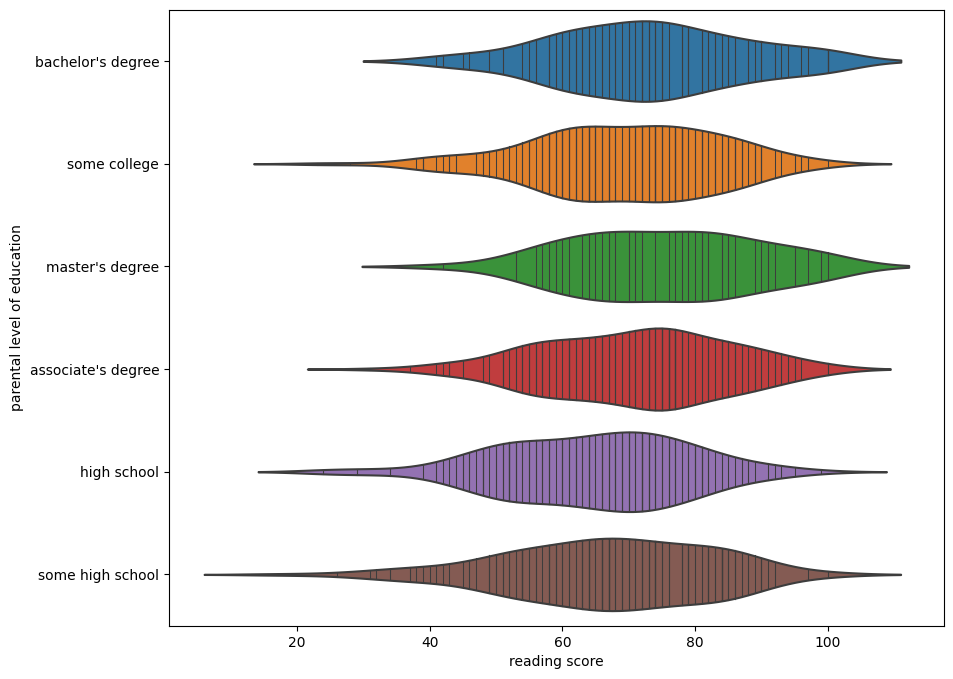

In [18]:
plt.figure(figsize=(10,8))
sns.violinplot(data=df, x = 'reading score', y = 'parental level of education', split=True, inner='stick') # will show a line for every distribution

<AxesSubplot:xlabel='reading score', ylabel='parental level of education'>

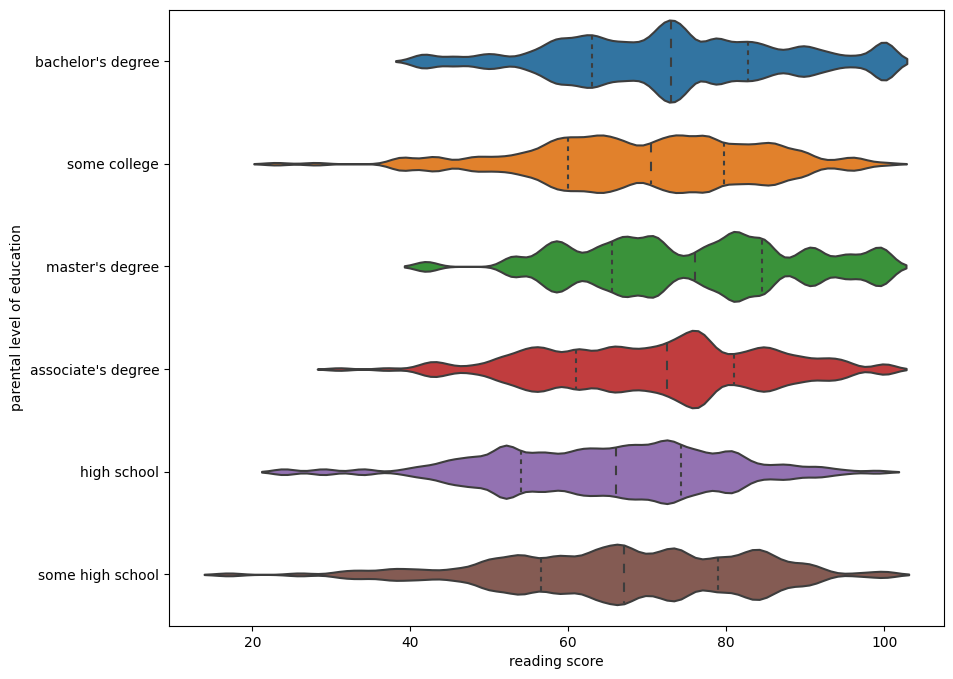

In [19]:
plt.figure(figsize=(10,8))
sns.violinplot(data=df, x = 'reading score', y = 'parental level of education', split=True, inner='quartile', bw=0.1) # will draw the quartile lines

Swarmplot

/home/zaimi/Desktop/python/venv/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 7.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='math score'>

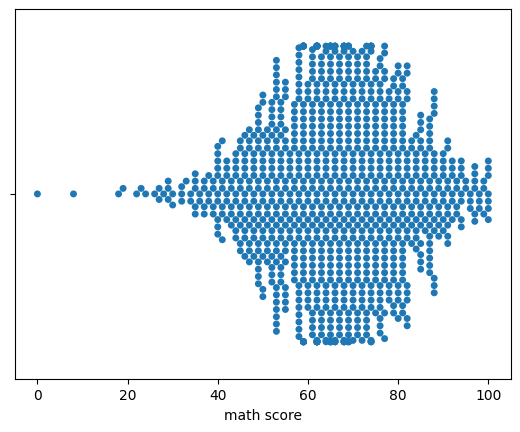

In [20]:
# Swarmplot
sns.swarmplot(data=df, x = 'math score')
# the dots are too big for them to fit in the plot

<AxesSubplot:xlabel='math score'>

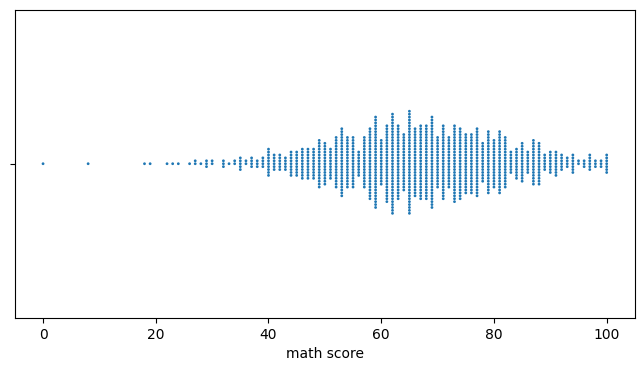

In [21]:
plt.figure(figsize=(8,4), dpi=100)
sns.swarmplot(data=df, x = 'math score', size = 2) # we will lower the size , this will show the distrbution for the math score

<AxesSubplot:xlabel='math score', ylabel='gender'>

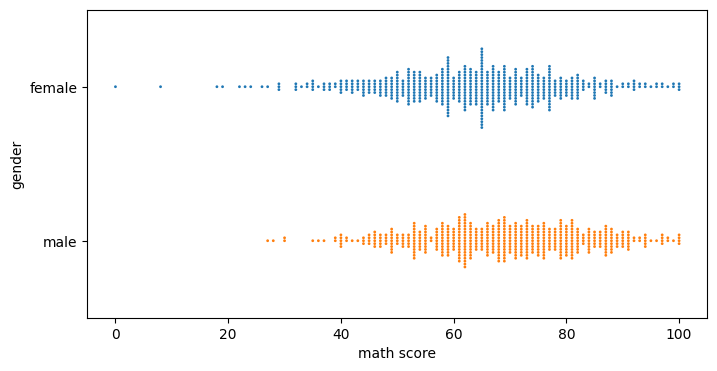

In [22]:
# We can show that y is a categorial value 
plt.figure(figsize=(8,4), dpi=100)
sns.swarmplot(data=df, x = 'math score', y = 'gender', size = 2)

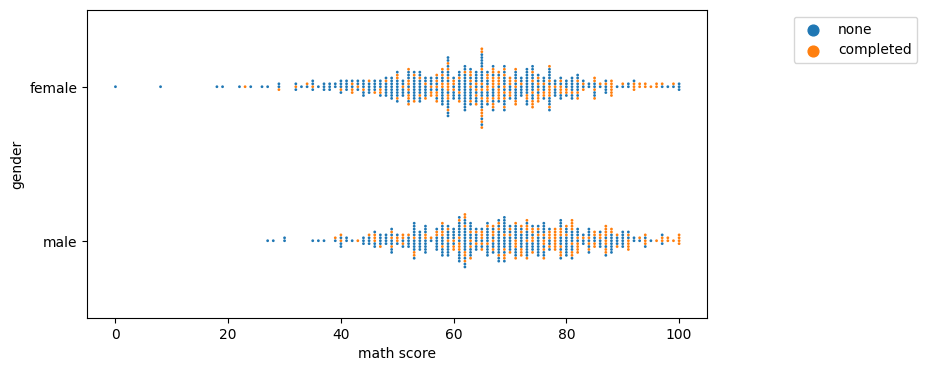

In [23]:
# We can show that y is a categorial value 
plt.figure(figsize=(8,4), dpi=100)
sns.swarmplot(data=df, x = 'math score', y = 'gender', size = 2, hue= 'test preparation course')
plt.legend(bbox_to_anchor=(1.35, 1))

<AxesSubplot:xlabel='math score', ylabel='gender'>

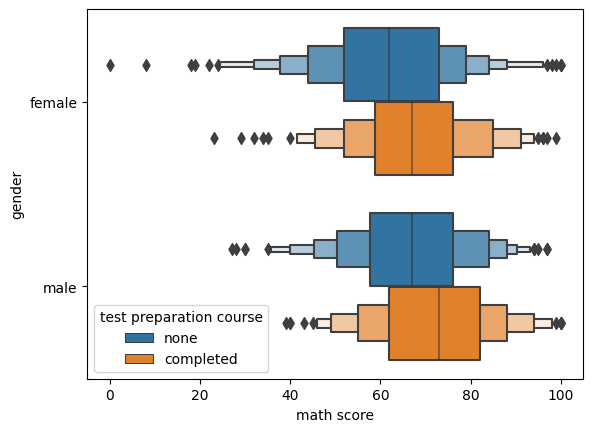

In [24]:
sns.boxenplot(data=df, x = 'math score', y ='gender', hue = 'test preparation course')

# Joined and Pair Plots

In [25]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


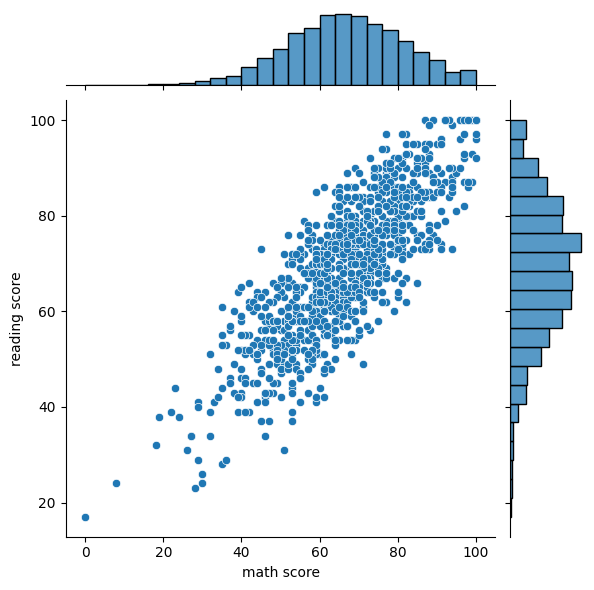

In [26]:
# in this case we need 2 continuous features in both axis. Is there a relation in math and reading scores
sns.jointplot(data =df[['math score', 'reading score']], x= 'math score', y= 'reading score')

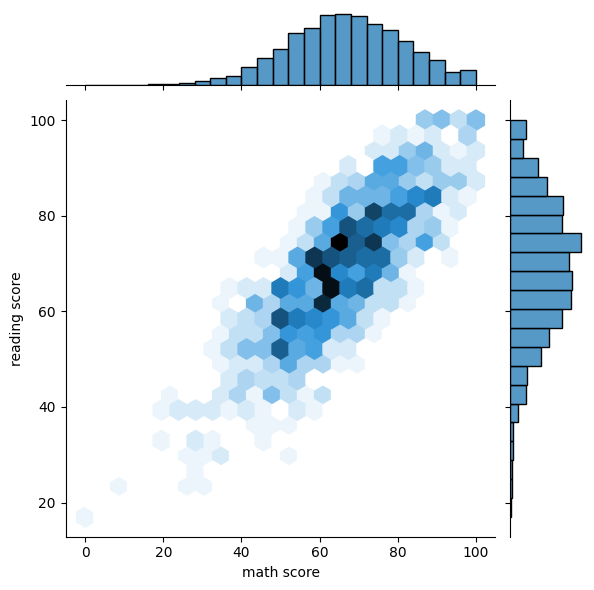

In [27]:
sns.jointplot(data = df[['math score', 'reading score']], x = 'math score', y = 'reading score', kind= 'hex') # by default it is scatter

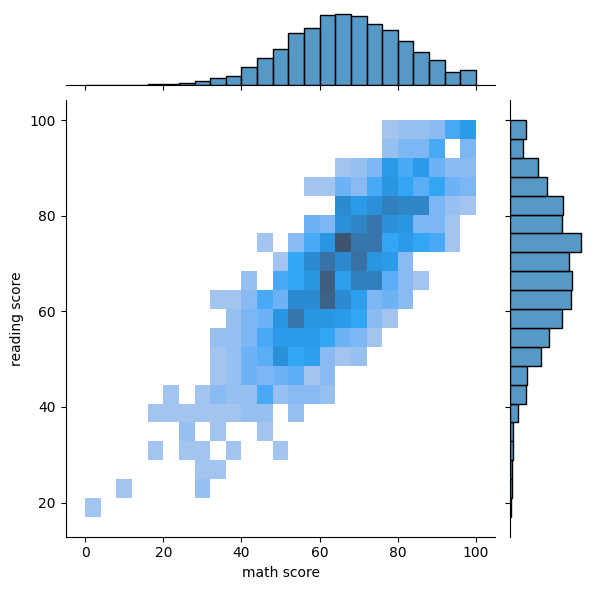

In [28]:
sns.jointplot(data = df[['math score', 'reading score']], x = 'math score', y = 'reading score', kind= 'hist') # they will be shown as squares

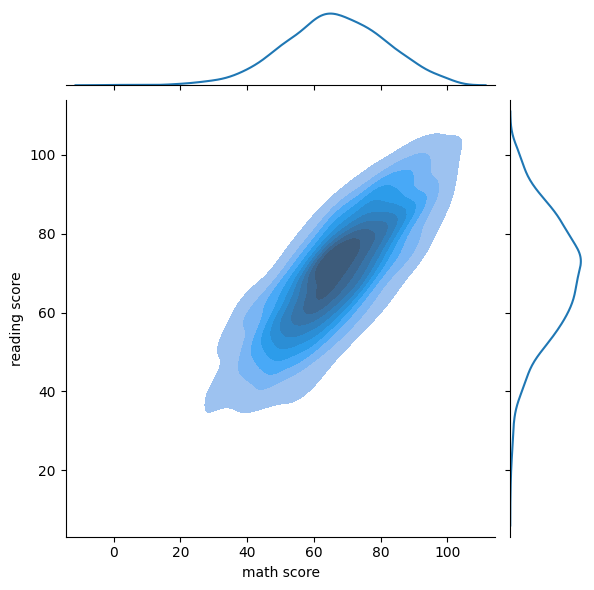

In [29]:
sns.jointplot(data = df[['math score', 'reading score']], x = 'math score', y = 'reading score', kind= 'kde', shade = True) # will show an estimated 2d kde

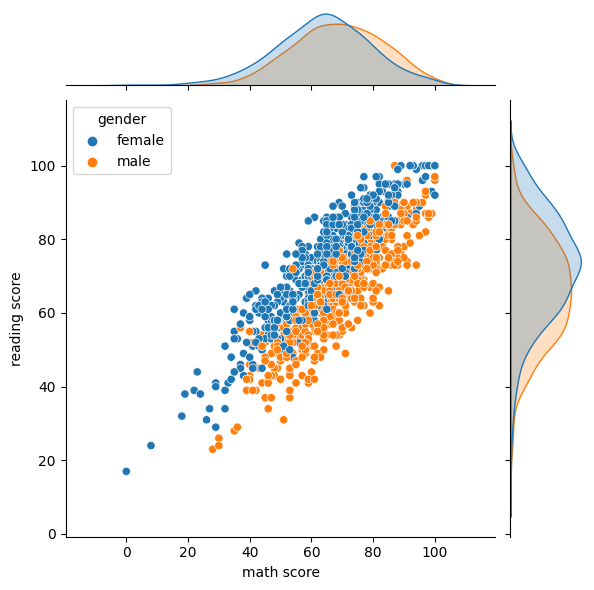

In [30]:
sns.jointplot(data = df[['math score', 'reading score', 'gender']], x = 'math score', y = 'reading score', kind= 'scatter', hue='gender')
# will create 2 sepperate kde x hue x sepperate features

# Pair plot is cpu intensive

In [31]:
sns.pairplot(date= df) # will grab all the numericcal columns and show the realtionship for each of them

TypeError: pairplot() got an unexpected keyword argument 'date'

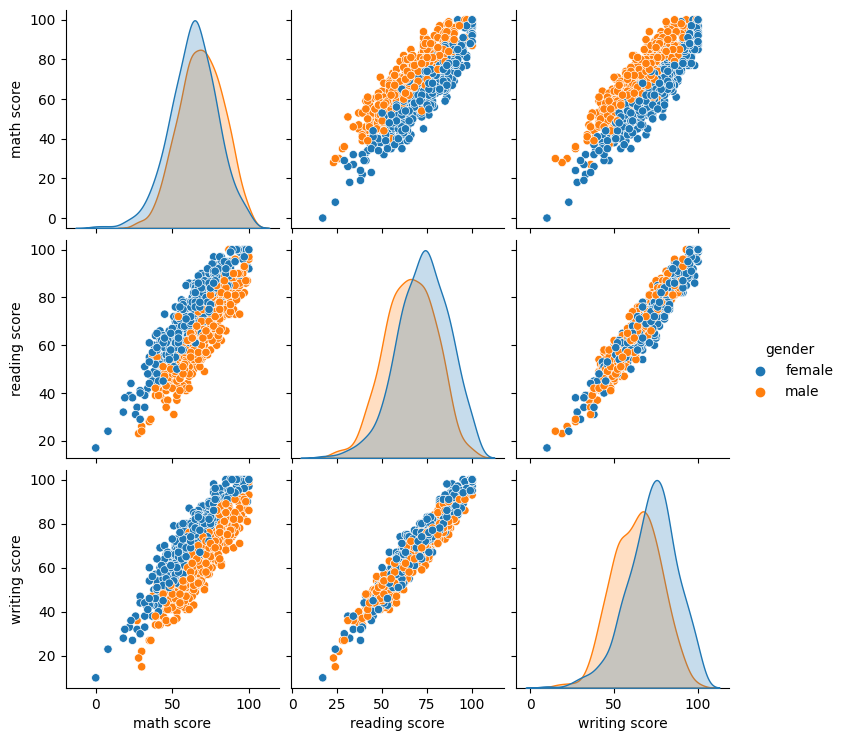

In [ ]:
sns.pairplot(data=df, hue='gender')

You can replace the kde's with diagonals

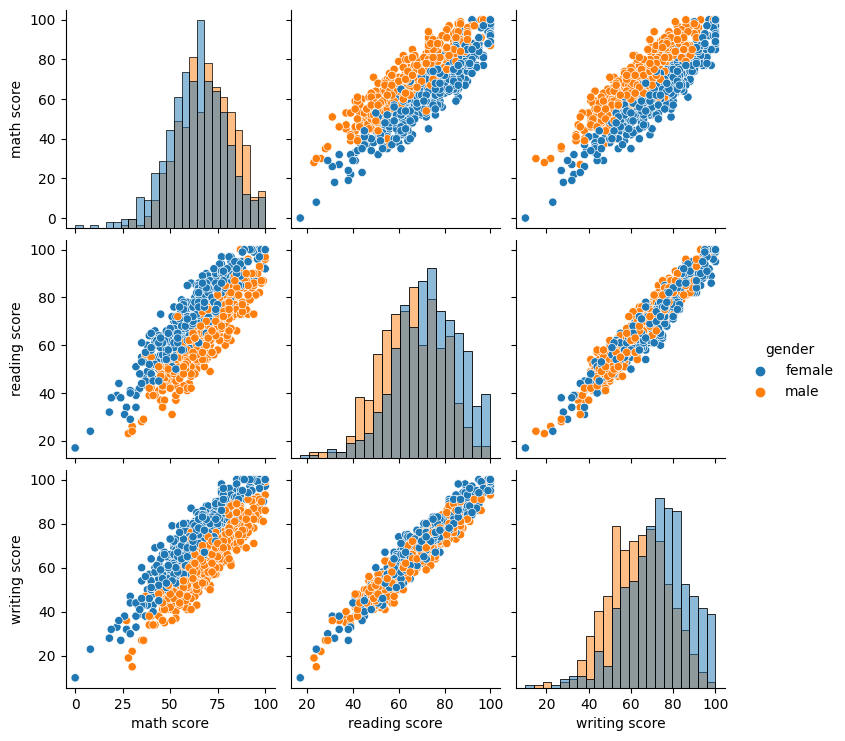

In [ ]:
sns.pairplot(data= df, hue='gender', diag_kind= 'hist') # replaces the kde with a histogram

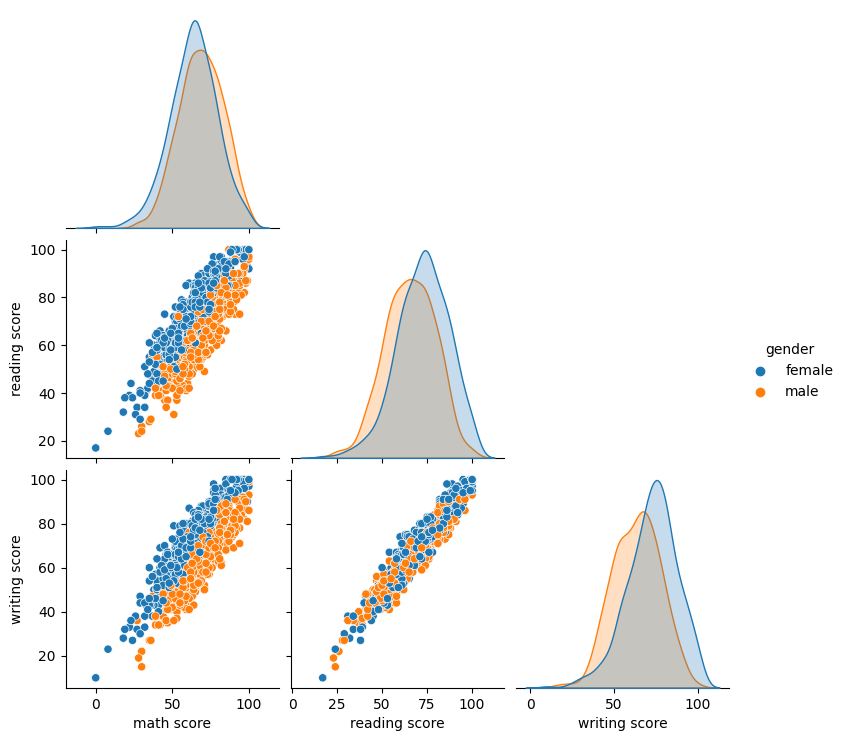

In [ ]:
sns.pairplot(data= df, hue='gender', corner=True) # replaces the repeating informations

# Seaborn grids use a Matplotlib subplots()

These way we can sepperate multiple rows and columns for the same kind into different plots

In [ ]:
# sns.catplot() # it takes in x y and additioal columns like rows and columns

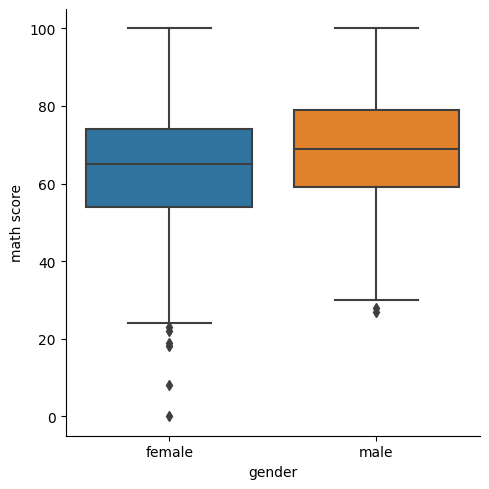

In [ ]:
sns.catplot(data = df, x = 'gender', y = 'math score', kind= 'box') # cat plots needs a specified kind (box) when called

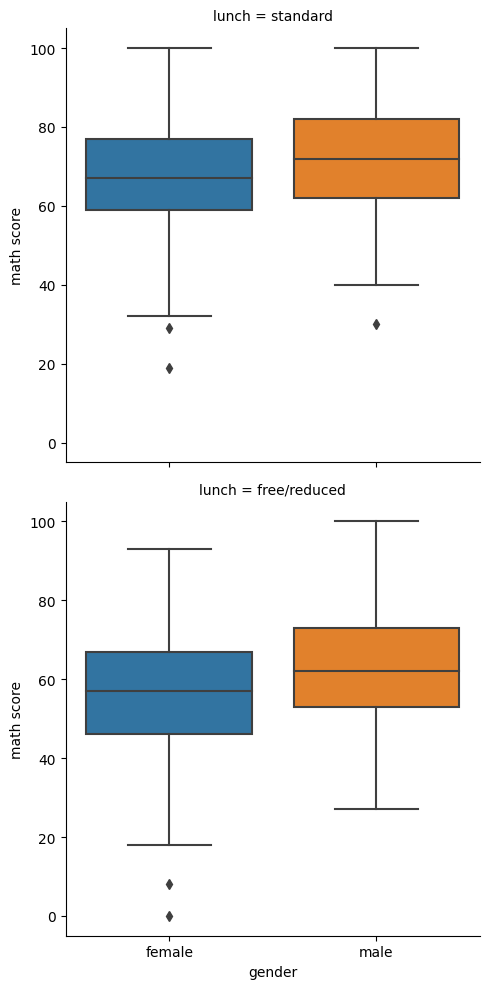

In [ ]:
sns.catplot(data= df, x ='gender', y = 'math score' , kind = 'box', row='lunch') # creates subplots for each kind of lunches on diff subplots, kinda like hue but on different plots

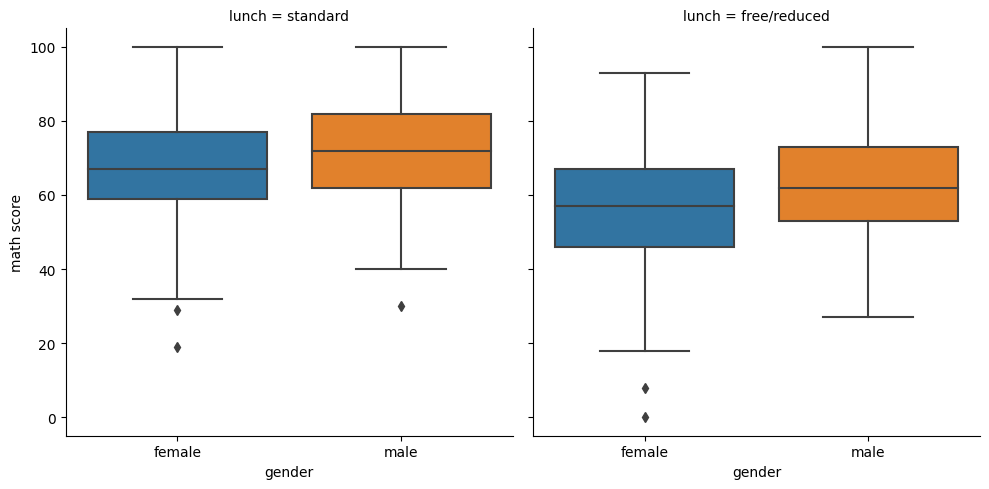

In [ ]:
sns.catplot(data= df, x ='gender', y = 'math score' , kind = 'box', col='lunch')


sns.catplot calls the sns.FaceGrid object

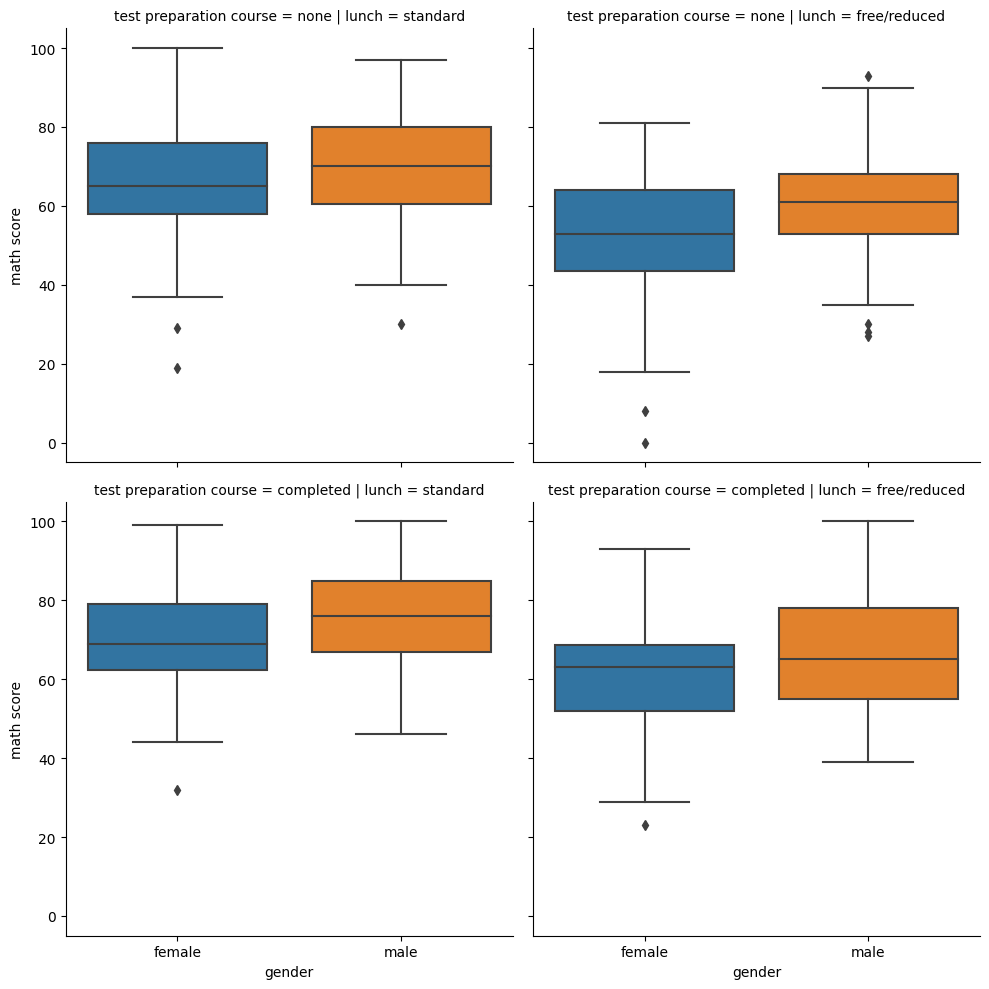

In [ ]:
sns.catplot(data= df, x ='gender', y = 'math score' , kind = 'box', row='test preparation course', col = 'lunch')



# !!!! IMPORTANT !!!!

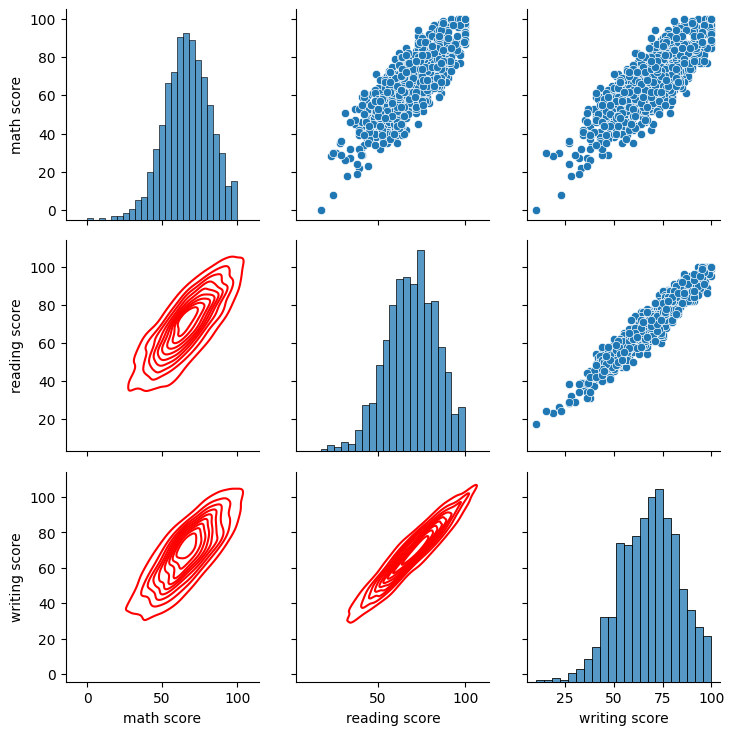

In [ ]:
# sns.pairplot() calls an instace of sns.Pairgrid() and then fills it based on the numeric columns
g = sns.PairGrid(df)
g = g.map_upper(sns.scatterplot) # we define the plot type on each mapping
g = g.map_lower(sns.kdeplot, colors='red')
g = g.map_diag(sns.histplot) # the diagonal shows the relation of the column with itself, if we plot the kde here it will have a different result

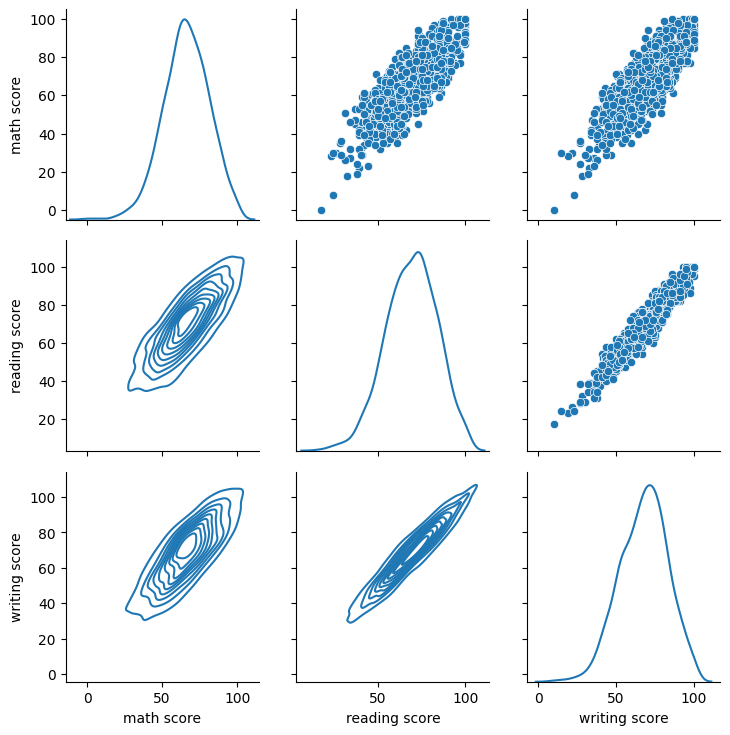

In [ ]:
g = sns.PairGrid(df)
g = g.map_upper(sns.scatterplot) # we define the plot type on each mapping
g = g.map_lower(sns.kdeplot)
g = g.map_diag(sns.kdeplot) # the diagonal shows the relation of the column with itself, if we plot the kde here it will have a different result

We can add in higher level parameters like hue, size etc

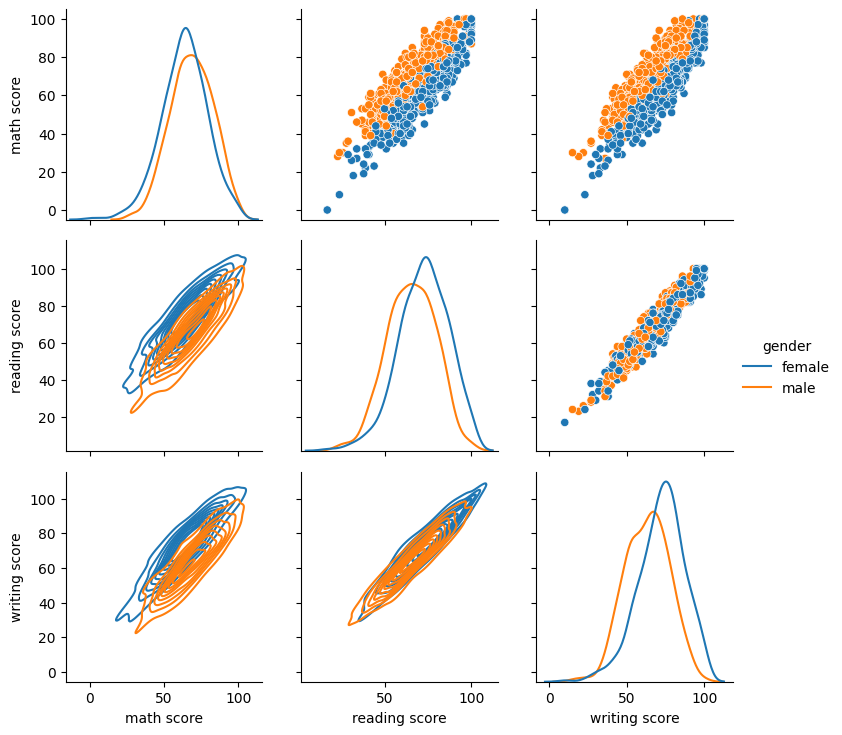

In [ ]:
g = sns.PairGrid(df, hue='gender')
g = g.map_upper(sns.scatterplot)
g = g.map_diag(sns.kdeplot)
g = g.map_lower(sns.kdeplot)
# we need to add the legend manualy
g.add_legend()

# Matrix plots are like pivot tables in dataframes

Not every dataframe is suited for a matrix table

In [32]:
# 1st - heatmap()
# hetmaps should have the same rate so that they can yield useable results
# seaborn comes with abilities to group togother similiar rows and columns
# similiar regions get grouped together
df = pd.read_csv('notebook/05-Seaborn/country_table.csv')

In [33]:
df

,Countries,Birth rate,Mortality rate,Life expectancy,Infant mortality rate,Growth rate
0,AFRICA,32.577,7.837,63.472,44.215,24.40
1,ASIA,15.796,7.030,73.787,23.185,8.44
2,EUROPE,10.118,11.163,78.740,3.750,0.38
3,LATIN AMERICA AND THE CARIBBEAN,15.886,6.444,75.649,14.570,8.89
4,NORTHERN AMERICA,11.780,8.833,79.269,5.563,6.11
5,OCEANIA,16.235,6.788,78.880,16.939,12.79
6,WORLD,17.963,7.601,72.766,27.492,10.36


<AxesSubplot:ylabel='Countries'>

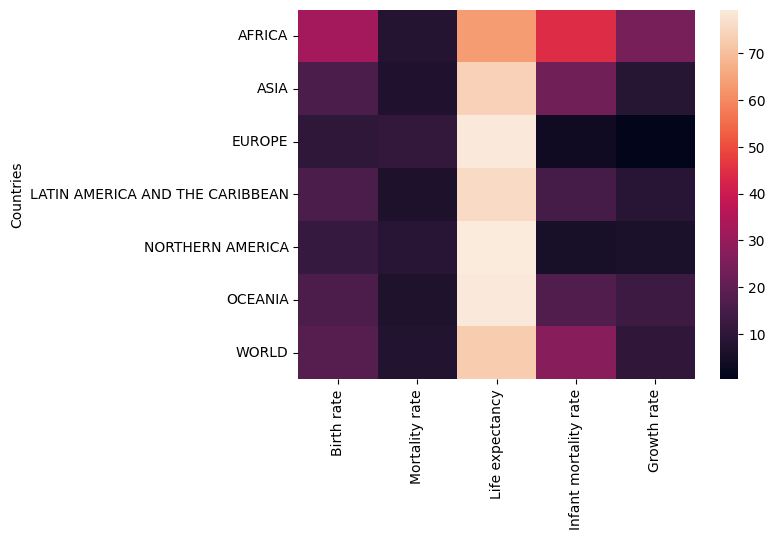

In [43]:
# too pass to a heatmap we first need a numerical index so we can see the results
df = df.set_index('Countries')
df.corr()
sns.heatmap(df) # The rates are too different heere 
# life expentacy with birth rate makes no sense since they show a different info
# we should drop life expentacy

In [44]:
df.head()

,Birth rate,Mortality rate,Life expectancy,Infant mortality rate,Growth rate
Countries,,,,,
AFRICA,32.577,7.837,63.472,44.215,24.40
ASIA,15.796,7.030,73.787,23.185,8.44
EUROPE,10.118,11.163,78.740,3.750,0.38
LATIN AMERICA AND THE CARIBBEAN,15.886,6.444,75.649,14.570,8.89
NORTHERN AMERICA,11.780,8.833,79.269,5.563,6.11


<AxesSubplot:ylabel='Countries'>

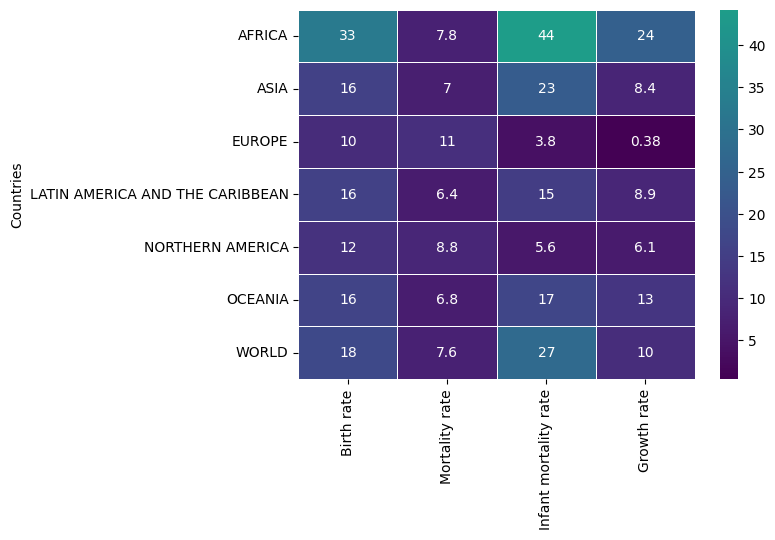

In [51]:
plt.figure(dpi=100)
sns.heatmap(df.drop('Life expectancy', axis=1), annot = True, lw=0.5, cmap='viridis', center=40) # to drop the whole columns
# lw will add spacing
# center will change the center of the color map, will change the centering of the color map

Clustermaps will cluster togetehr the groopings of the different columns

<Figure size 640x480 with 0 Axes>

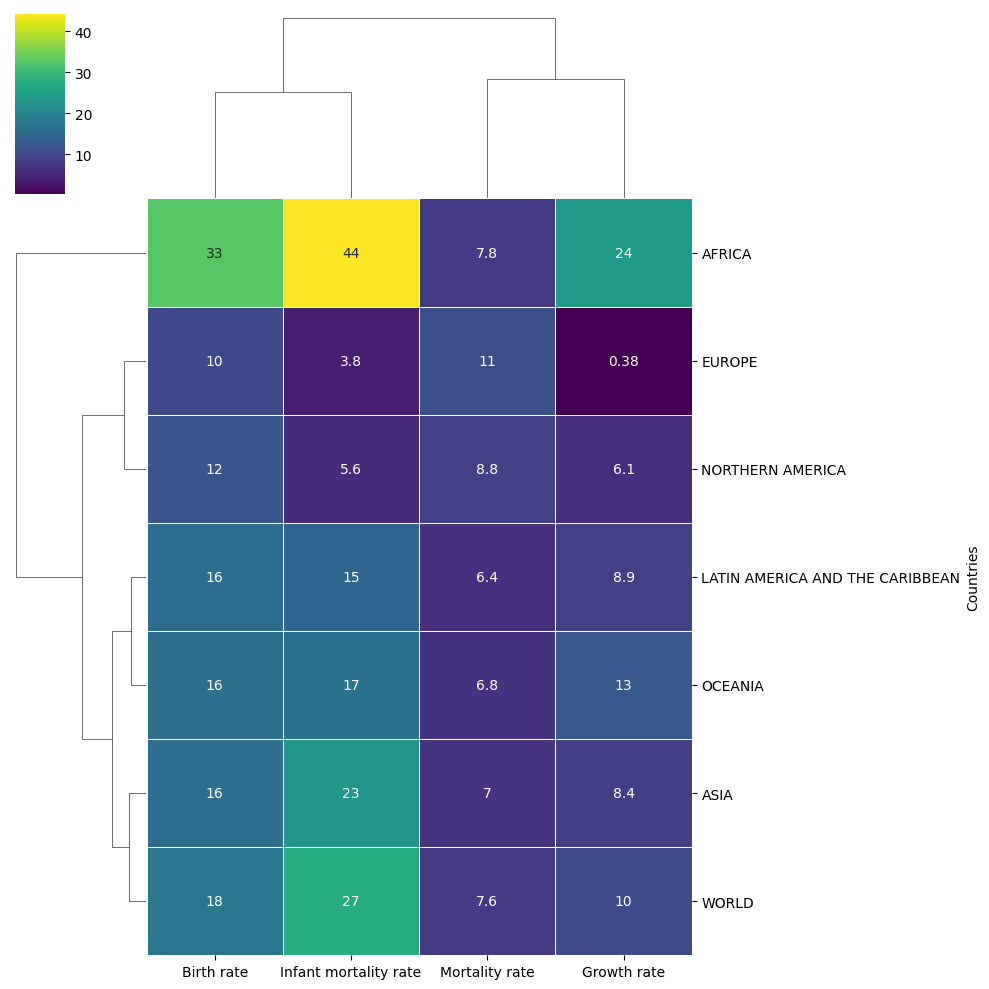

In [53]:
plt.figure(dpi=100)
sns.clustermap(df.drop('Life expectancy', axis=1), annot = True, lw=0.5, cmap='viridis') # to drop the whole columns
# The rates will be gruped together x country regions
# Many times it makes sense not to cluster the columns together so we will jsut cluster the rows, example on the next fig
# On this case it makes sense to cluster the columns

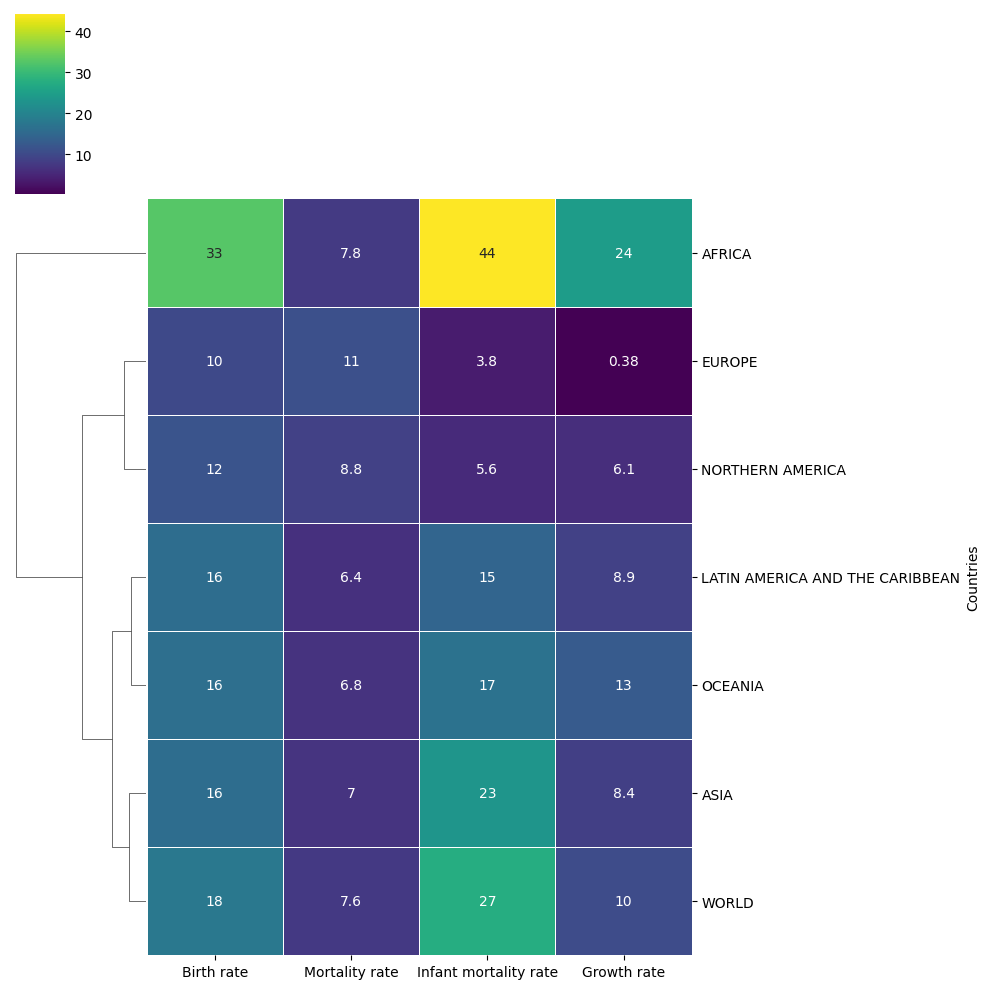

In [54]:
sns.clustermap(df.drop('Life expectancy', axis=1), annot = True, lw=0.5, cmap='viridis', col_cluster=False) # to drop the whole columns
